In [33]:
import pandas as pd
import seaborn as sn
import numpy as np
from keras import models
from keras import layers
from keras.utils import to_categorical

cardboard_f = pd.read_excel("cardboard.xlsx", header=None)
cardboard_f = cardboard_f.to_numpy()

In [34]:
np.random.shuffle(cardboard_f)

In [35]:
cardboard_f

array([[2.34e+02, 3.23e-01, 2.80e+01, ..., 2.90e+00, 2.90e+01, 1.00e+00],
       [3.47e+02, 3.45e-01, 3.33e+01, ..., 3.20e+00, 1.90e+01, 0.00e+00],
       [2.74e+02, 3.28e-01, 3.04e+01, ..., 3.22e+00, 1.60e+01, 1.00e+00],
       ...,
       [3.57e+02, 3.22e-01, 3.31e+01, ..., 3.36e+00, 1.30e+01, 1.00e+00],
       [3.63e+02, 3.40e-01, 3.44e+01, ..., 3.20e+00, 2.00e+01, 0.00e+00],
       [2.95e+02, 3.57e-01, 3.02e+01, ..., 2.90e+00, 1.50e+01, 1.00e+00]])

In [36]:
cardboard_f.shape

(1800, 11)

In [37]:
cardboard_f_train = cardboard_f[:900,:10]
cardboard_f_test = cardboard_f[900:,:10]

train_labels = cardboard_f[:900,10]
test_labels = cardboard_f[900:,10]

In [38]:
len(train_labels)
train_labels = train_labels.astype(int)

In [39]:
len(test_labels)
test_labels = test_labels.astype(int)

In [40]:
train_labels = to_categorical(train_labels)
train_labels.shape

(900, 2)

In [41]:
network = models.Sequential()
network.add(layers.Dense(90, activation='relu', input_shape=(10,)))
network.add(layers.Dense(60, activation='relu', input_shape=(10,)))
network.add(layers.Dense(2, activation='softmax'))

In [42]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [43]:
x_val = cardboard_f_train[:450]
partial_x_train = cardboard_f_train[450:]

y_val = train_labels[:450]
partial_y_train = train_labels[450:]

In [44]:
history = network.fit(partial_x_train,
                    partial_y_train,
                    epochs=500,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    verbose=0)

In [45]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

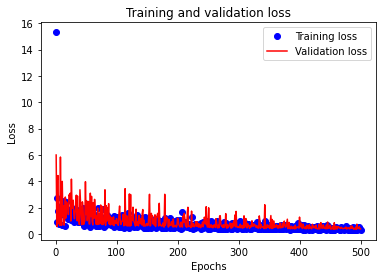

In [46]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

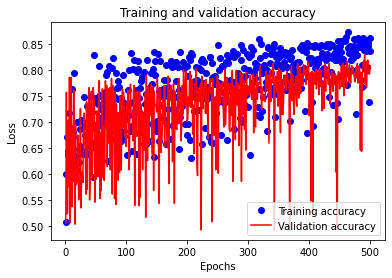

In [47]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [48]:
prediction_vector=network.predict(cardboard_f_test)
prediction_dataFrame=pd.DataFrame(prediction_vector)

In [49]:
type_zero_count = 0
type_one_count = 0

guesses = np.ones(len(prediction_vector))

for j in range (len(prediction_vector)):
    if prediction_vector[j,0] > prediction_vector[j,1]:
        type_zero_count += 1
        guesses[j] = 0
    else:
        type_one_count += 1
        guesses[j] = 1
        
print("-------------------------------------------------------------------")
print("Hay un total de {} láminas de cartón.".format(len(prediction_vector)))
print("Se estima que hay {} láminas del tipo A y {} láminas del tipo B.".format(type_zero_count,type_one_count))
print("-------------------------------------------------------------------")

hits = 0
for j in range (len(guesses)):    
    if guesses[j] == test_labels[j]:
        hits += 1
        
efficiency = round(hits/len(guesses)*100,2)
non_hits = len(guesses) - hits

print("\n-------------------------------------------------------------------")
print("Se tuvo un total de {} aciertos y {} no aciertos.".format(hits,non_hits))
print("La eficacia de la red neuronal para los datos TEST es de {}%".format(efficiency))
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Hay un total de 900 láminas de cartón.
Se estima que hay 455 láminas del tipo A y 445 láminas del tipo B.
-------------------------------------------------------------------

-------------------------------------------------------------------
Se tuvo un total de 744 aciertos y 156 no aciertos.
La eficacia de la red neuronal para los datos TEST es de 82.67%
-------------------------------------------------------------------


In [50]:
validation_accuracy_values=np.zeros(len(prediction_vector))
c=0;
for i in history_dict['val_accuracy']:
    if c < len(prediction_vector):
        validation_accuracy_values[c] = i
        c+=1
val_acc_max = np.amax(validation_accuracy_values)
index = np.where(validation_accuracy_values == val_acc_max)

print("El máximo valor de validation accuracy fue de: {:.2f}%".format(val_acc_max*100))
print("En la iteración número {}".format(index[0]+1))

El máximo valor de validation accuracy fue de: 83.11%
En la iteración número [491]
